In [ ]:
"We take a cluster on a training quarter, then get the returns for a test quarter and look at "
"how the clusteres performed in this testing quarter."

import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Set train and test quarters
train_quarter = "2022_Q4"
test_quarter = "2023_Q1"

# Step 2: Load fundamentals + cluster assignments for train quarter
df_train = pd.read_csv(f'../data/processed/quarterly/cluster_labels/{train_quarter}_clusters.csv')
df_train = df_train.dropna()

# Step 3: Get unique tickers
tickers = df_train['symbol'].unique().tolist()

/var/folders/sz/y6mbyrnd7d1g13bfc3t_0q5c0000gn/T/ipykernel_28978/3081212289.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# Define rough start and end of Q1 2023
#CHANGE depending on what TEST quarter we choose 
start_date = '2023-01-03'
end_date = '2023-03-31'

In [ ]:
# Step 5: Download adjusted close prices FOR TEST SET
prices = yf.download(tickers, start=start_date, end=end_date)['Close']

[*********************100%***********************]  496 of 496 completed

6 Failed downloads:
['HUBB']: ConnectTimeout(MaxRetryError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/HUBB?period1=1672722000&period2=1680235200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=wfSQq7HcxS7 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x16407f0b0>, 'Connection to query2.finance.yahoo.com timed out. (connect timeout=10)'))"))
['MGM']: ConnectTimeout(MaxRetryError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/MGM?period1=1672722000&period2=1680235200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=wfSQq7HcxS7 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x16407e5a0>, 'Connection to query2.finance.yahoo.com timed out. (connect timeout=10)'))"))
['MAS'

Ticker               A        AAPL        ABBV        ABNB         ABT  \
Date                                                                     
2023-01-03  147.617615  123.632530  149.164093   84.900002  104.779053   
2023-01-04  149.221313  124.907715  150.367493   88.720001  106.337631   
2023-01-05  149.654205  123.583099  150.183777   87.709999  105.945610   
2023-01-06  145.285919  128.130219  152.994736   88.519997  107.408569   
2023-01-09  145.089127  128.654129  148.502716   89.239998  107.236465   
...                ...         ...         ...         ...         ...   
2023-03-24  129.829529  158.650055  146.538864  116.919998   94.178696   
2023-03-27  130.921600  156.699738  146.093735  117.910004   94.572502   
2023-03-28  130.488724  156.076004  146.752151  116.610001   93.275826   
2023-03-29  131.689011  159.164856  146.520309  118.800003   94.726189   
2023-03-30  132.318695  160.738983  146.446106  122.279999   95.168030   

Ticker           ACGL         ACN    

In [12]:
prices = prices.dropna(axis=1, how='any')

# Step 6: Calculate return over the test quarter
start_prices = prices.iloc[0]
end_prices = prices.iloc[-1]
returns = ((end_prices - start_prices) / start_prices).reset_index()
returns.columns = ['symbol', 'next_q_return']

In [13]:
df_train = pd.read_csv(f'../data/processed/quarterly/cluster_labels/{train_quarter}_clusters.csv')
df_clustered = df_train[['symbol', 'cluster']].drop_duplicates()

df_eval = df_clustered.merge(returns, on='symbol', how='inner')

In [14]:
performance_summary = df_eval.groupby('cluster')['next_q_return'].agg(['mean', 'median', 'std', 'count'])
performance_summary = performance_summary.sort_values(by='mean', ascending=False)
print(performance_summary)

             mean    median       std  count
cluster                                     
4        0.185767  0.131402  0.216029     20
10       0.133997  0.064206  0.209190      9
6        0.127370  0.122115  0.211615     39
16       0.091037  0.072810  0.161412      8
11       0.078344  0.037659  0.135582     11
15       0.061908  0.061908  0.050916      2
9        0.053447  0.027000  0.158365     50
14       0.048677  0.057872  0.083303     14
13       0.029473  0.015298  0.092323     24
12       0.028272  0.010919  0.123043     64
8        0.012357 -0.003237  0.129331    103
2        0.003755 -0.036640  0.159469      6
3        0.001721 -0.001183  0.099793     99
0       -0.021030 -0.022770  0.136008     28
7       -0.066683 -0.061958  0.088659     10
1       -0.113147 -0.113147  0.013006      2
5       -0.192495 -0.192495       NaN      1


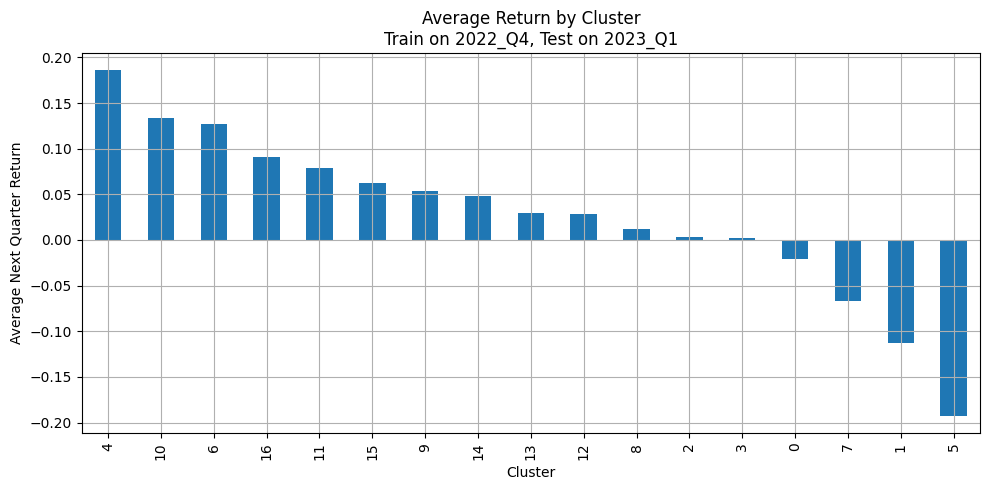

In [15]:
performance_summary['mean'].plot(kind='bar', figsize=(10, 5))
plt.title(f'Average Return by Cluster\nTrain on {train_quarter}, Test on {test_quarter}')
plt.ylabel('Average Next Quarter Return')
plt.xlabel('Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()